> ## Make a copy of this notebook (File menu -> Make a Copy...)

### Homework Question 1

Write succinct and clear answers to the following questions:

* Why do we want a predictor not to be *biased*?
* Why do we want a predictor not to have large *variance*?
* Why do these two often work in opposition to one another?

1. Bias is the difference between our expected prediction from the model for a set of given inputs and the correct value for those inputs. A highly biased model will only be able to predict in situations very similar to those it was designed with. This means the model varies highly for different input data that varies highly. 


2. A model having high variance means that the model doesn't do well predicting new points. If you hope to have a model that can predict outside of the scope of the points you built it with, it is beneficial to have less variance.


3. They typically work in opposition to each other because a high bias will result in a high concentration to a certain cluster area, thus reducing the possible places the points could be (like narrowing down on a specific zone)
A high variance means the opposite, i.e. that there is a wide range of possible places the points could be, thus the points are typically not concentrated at any given cluster (which is a requisite for high bias)
We see then that the two oppose each other by (typically) producing diametrically opposite effects on the output data

### Homework Question 2
For the same set of points as in Question 8 from the lab, find the best fit line. Also find a cubic function that passes through all the points precisely. Plot these functions, as well as the quadratic from Question 8, and your points. Rank the three functions in order of bias as a model for the data points, then in order of variance. 

**Note:** we have no real way of quantifying variance. Your answer should include some detail as to how you decide on your ranking. Question 3 from the lab may help.

In [388]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from rref import rref

# Old Functions
#function to swap two rows given matrix and indices 
def swaprows(As,i,j): 
    As[[i,j]] = As[[j,i]] #swap rows 
    return As

#function to add mutliple (c) of row i to row j of matrix A
def rowaddmult(Am,i,j,c):
    Am[j] += c * Am[i] #perform row replacement
    return Am
            
def backsub(U, v):
    r,c = U.shape
    for x in reversed(range(0,r)):
        v[x] -= v[x+1:r] @ U[x,x+1:c]
        v[x] /= U[x,x]
        
def fwdsub(L, v):
    r,c = L.shape
    for x in range(1,r):
        v[x] -= v[0:x] @ L[x,0:x]


def LU(Ax):
    U = Ax.copy()
    L = np.zeros_like(Ax)
    P = L.copy()
    np.fill_diagonal(P, 1.)
    r,c = U.shape
    for x in range(r):
        if x < r-1:
            pivot = np.argmax(np.absolute(Ax[x:,x]))+x
            if type(pivot)==type(Ax):
                pivot = pivot[0]
            swaprows(U,x,pivot)
            swaprows(L,x,pivot)
            swaprows(P,x,pivot)
        for y in range(x+1, r):
            c = U[y,x]/U[x,x]
            rowaddmult(U, x, y, -c)
            L[y,x] = c
    np.fill_diagonal(L, 1.)
    return (L,U,P)         
 
def LUSolve(L, U, P, v):
    v = P@v
    fwdsub(L, v)
    backsub(U, v)
    return v

[-0.01694915 -0.72881356]
[ 2.24246231 -6.82035176 -3.99748744]
[ 0.44166667  0.225      -6.21666667 -2.        ]


(50, -50)

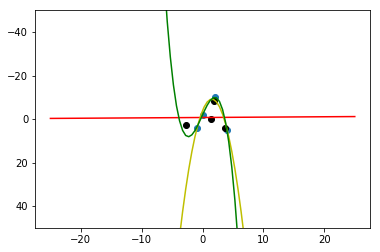

In [389]:
# Code

# Initialize data for different models
A1 = np.array([[-1,1],[2,1],[0,1],[4,1]]).astype('float')
A2 = np.array([[1,-1,1],[4,2,1],[0,0,1],[16,4,1]]).astype('float')
A3 = np.array([[-1,1,-1,1],[8,4,2,1],[0,0,0,1],[64,16,4,1]]).astype('float')
b = np.array([4,-10,-2,5]).astype('float')

# Given matrix A and vector B returns the result of the normal equation
def predict(A, b):
    AtA = A.T@A
    Atb = A.T@b
    L,U,P = LU(AtA)
    x_hat = LUSolve(L, U, P, Atb)
    print(x_hat)
    return x_hat

# Take an x value, the power of x, and x coefficients
# returns our model's prediction yhat
def y_hat(x, d, x_hat):
    pwr = np.arange(d+1)[::-1]
    xaa = np.full((1, d+1), x)
    xpwr = np.power(xaa, pwr)
    return xpwr @ x_hat

# Find coefficients
xh1 = predict(A1, b)
xh2 = predict(A2, b)
xh3 = predict(A3, b)

x = np.linspace(-25,25,100)

# Map x values to y predictions
y1 = np.array([y_hat(z, 1, xh1) for z in x])
y2 = np.array([y_hat(z, 2, xh2) for z in x])
y3 = np.array([y_hat(z, 3, xh3) for z in x])

plt.plot(x,y1,'r')
plt.plot(x,y2,'y')
plt.plot(x,y3,'g')

plt.scatter(A[:,1], b)

# Add random noise and then see
A_noise = A[:,1] +  (np.random.rand(1,A.shape[0])*5-2.5)
b_noise = b + (np.random.rand(1,A.shape[0])*5-2.5)
plt.scatter(A_noise, b_noise, c="black")

plt.ylim((50, -50)) 

# Answer
Error|Variance|Bias|
---|--- |::---|  
Most | Cubic | Linear | 
... | Quadratic | Quadratic | 
Least | Linear | Cubic | 

Using a similar method from question 3 on the lab, we added random noise to each of the points. The random noise we added simulates natural variance that occurs in data. Comparing how well our models fit the 'new' data points we can make claims about their bias and variance. First for bias, we see that the cubic and quadratic functions fit the data very well (cubic performing slightly better) while the linear function does not capture much of the natural variance of the training data. As for variance, although the cubic and quadratic functions both are able to match the trends of the original 4 points, they struggle when it comes to fitting the newer points. It could be argued that they still give a better prediction for the random data but relative increase in error shows they they are more variable models.

### Homework Question 3
Given your classifier from Question 14 in the lab, and given a point from your combined set of points, consider the question "Is this point in the cluster on the top left?' Compute the following and explain your answers (note, this is similar to Question 15 from the lab):
1. The probability of getting a false positive (that is, a 'yes' answer when the correct answer is 'no'.);
1. The probability of getting a false negative (that is, a 'no' answer when the correct answer is 'yes'.).
    
**Note:** You may do this question using code, or using mathematical analysis of your line and clusters. Bonus points for doing both and explaining why your answers (may) differ.

The probability of a false negative is equal to the area of the intersection between lower right rectangle and our affine line divided by the total area of the rectangle. 

$$P=A^{i}/A=(Len^{vert}*Len^{horz}/2)/4^2=(8-vintersection)*(hintersection-8)/32$$

$$vintersection=y=-(8a+c)/b$$

$$hintersection=x=-(8b+c)/a$$

$$P=(8+(8a+c)/b)*(-(8b+c)/a-8)/32$$

and

$$P=A^{i}/A=(Len^{vert}*Len^{horz}/2)/4^2=(vintersection-5)*(10-hintersection)/50$$

$$vintersection=y=-(10a+c)/b$$

$$hintersection=x=-(5b+c)/a$$

$$P=(-(10a+c)/b-5)*(10+(5b+c)/a)/50$$


The false negative and false positives will have different values because they represent different areas. Mathmatically:

$$P^{+}=P^{T+}+P^{F-}$$
$$P^{-}=P^{T-}+P^{F+}$$
These values have no relation.

[-0.30972355  0.23155183  1.18970227]
Predicted false negatives  15.677194309214986
Predicted false positives  13.876873552755251
False negatives 20
False positives 15


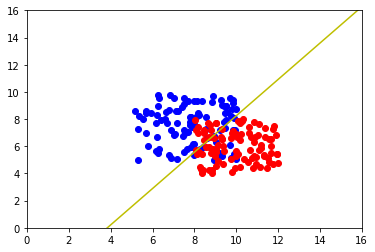

In [390]:
rx0 = np.random.rand(100)*5+5
ry0 = np.random.rand(100)*5+5
rx1 = np.random.rand(100)*4+8
ry1 = np.random.rand(100)*4+4
rx = np.concatenate((rx0,rx1))
ry = np.concatenate((ry0,ry1))
#(5,5)(5,5) and (10,10)(10,10), and the second cluster is in a rectangle cornered by (8,4)(8,4) and (12,8)
plt.scatter(rx0,ry0,c='b')
plt.scatter(rx1,ry1,c='r')

rxy = np.ones((200,3))
rxy[:,0] = rx
rxy[:,1] = ry 

v = np.ones((1,200))[0,:]
v[100:] *= -1

AtA = rxy.T@rxy
Atb = rxy.T@v

L,U,P = LU(AtA)
x_hat = LUSolve(L,U,P, Atb.T)

print(x_hat)

def y_hat_affine(x):
    return (x * x_hat[0]/x_hat[1] + x_hat[-1]/x_hat[1])*-1

x = np.linspace(-25,25,100)
y = np.array([y_hat_affine(z) for z in x])
plt.plot(x,y,'y')
plt.ylim((0,16))
plt.xlim((0,16))

pred_fn = (10+ (5 * x_hat[1] + x_hat[2]) / x_hat[0])*(-1*(10* x_hat[0] + x_hat[2]) / x_hat[1] - 5)/50 * 100
pred_fp = (8 + (8 * x_hat[0] + x_hat[2]) / x_hat[1])*(-1*(8 * x_hat[1] + x_hat[2]) / x_hat[0] - 8)/32 * 100
print("Predicted false negatives ", pred_fn)
print("Predicted false positives ", pred_fp)

false_neg = 100-f(rx0,ry0,x_hat,0).sum()
false_pos = f(rx1,ry1,x_hat,0).sum()
print("False negatives", false_neg)
print("False positives", false_pos)

### Homework Question 4

In Question 15 of the lab and Question 3 above, you likely used the criterion 'Is $f(x,y)$ positive or negative?' to decide which cluster the point was in. This may not be the best possible criterion given the data you generated. You might get better results if the question was 'Is $f(x,y)>c?$' for some non-zero number c.

1. Given the data you generated, find the number c that gives the best classifier. Write code that zeros in on the best c by examining a series of possible numbers c between $-1$ and $1$. Perhaps start by looking at different c's separated by 0.1, then 'zoom in' once you know which two of those are 'best'. You should aim to get the best c (i.e. the one that minimizes the total error - false positives plus false negatives) to two or three decimal places. What criteria did you use to decide what the ideal c was?
1. Generate another set of data in the same clusters, and apply your classifier to it with your ideal c from the first part of this question. Do you get the same error rate? Why or why not? 

In [394]:
def f(x,y,x_hat,c):
    return x*x_hat[0]+y*x_hat[1]+x_hat[2]>c

false_neg = f(rx0,ry0,x_hat,0)
false_pos = f(rx1,ry1,x_hat,0)
zero_cost = 100 - false_neg.sum() + false_pos.sum()
print("c = 0")
print("Error =", zero_cost, end="\n\n")

def zoom(cmin, cmax, inc, prec):
    if prec == 0:
        return cmin+5*inc
    min_cost = 100 - f(rx0,ry0,x_hat,cmin).sum() + f(rx1,ry1,x_hat,cmin).sum()
    x = cmin
    while x <= cmax:
        t_cost = 100 - f(rx0,ry0,x_hat,x).sum() + f(rx1,ry1,x_hat,x).sum()
        if t_cost < min_cost:
            min_cost = t_cost
            cmin = x
        x += inc
    inc /= 10
    return zoom(cmin-5*inc, cmin+5*inc,inc, prec-1)


c = zoom(-1, 1, .1, 3)

false_neg = f(rx0,ry0,x_hat,c)
false_pos = f(rx1,ry1,x_hat,c)
c_cost = 100-false_neg.sum()+false_pos.sum()
print("c =", round(c,3))
print("Error =", c_cost)    

c = 0
Error = 35

c = -0.075
Error = 30


 **What criteria did you use to decide what the ideal c was?**<br>
 We minimized total error.<br><br>
 **Do you get the same error rate? Why or why not?**<br>
 No. The original data is randomly generated so sometimes more of the points are located in the ranges where they will be incorrectly classified. If all of the randomly generated points fell within the `2x3` intersection of the clusters then our model would have very high error. 